# cancer TRAIN

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## preprocess the data

In [3]:

from pathlib import Path

# Define the parent directory containing all folds
parent_dir = Path(r"D:\01 STUDY MATERIAL\ai project\mkfold")

# Initialize an empty list to store datasets
training_datasets = []

# Loop through each fold directory (e.g., fold1, fold2, ...)
for fold in range(1, 6):  # Assuming 5 folds named fold1, fold2, ...
    fold_train_dir = parent_dir / f"fold{fold}" / "train"
    
    # Load the training dataset for the current fold
    training_set = tf.keras.utils.image_dataset_from_directory(
        fold_train_dir,
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=4,
        image_size=(128, 128),
        shuffle=True,
        interpolation="bilinear"
    )
    
    # Append to the list
    training_datasets.append(training_set)

# Combine all datasets into one
combined_training_set = training_datasets[0]
for ds in training_datasets[1:]:
    combined_training_set = combined_training_set.concatenate(ds)

# Optional: Prefetch data for faster training



Found 5005 files belonging to 4 classes.
Found 5506 files belonging to 4 classes.
Found 5332 files belonging to 4 classes.
Found 5211 files belonging to 4 classes.
Found 4826 files belonging to 4 classes.



### Validation Image Preprocessing

In [4]:
import tensorflow as tf
from pathlib import Path

# Define the parent directory containing all folds
parent_dir = Path(r"D:\01 STUDY MATERIAL\ai project\mkfold")

# Initialize an empty list to store validation datasets
validation_datasets = []

# Loop through each fold directory (e.g., fold1, fold2, ...)
for fold in range(1, 6):  # Assuming 5 folds named fold1, fold2, ...
    fold_validation_dir = parent_dir / f"fold{fold}" / "test"
    
    # Load the validation dataset for the current fold
    validation_set = tf.keras.utils.image_dataset_from_directory(
        fold_validation_dir,
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=4,
        image_size=(128, 128),
        shuffle=False,  # Shuffle should be False for validation
        interpolation="bilinear"
    )
    
    # Append to the list
    validation_datasets.append(validation_set)

# Combine all validation datasets into one
combined_validation_set = validation_datasets[0]
for ds in validation_datasets[1:]:
    combined_validation_set = combined_validation_set.concatenate(ds)

# Optional: Prefetch validation data for performance

class_name = validation_set.class_names
print(class_name)

Found 2904 files belonging to 4 classes.
Found 2403 files belonging to 4 classes.
Found 2577 files belonging to 4 classes.
Found 2698 files belonging to 4 classes.
Found 3083 files belonging to 4 classes.
['100X', '200X', '400X', '40X']


# Building Model

In [5]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

## Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1207/1207 [==============================] - 23s 14ms/step - loss: 1.3426 - accuracy: 0.4115 - val_loss: 0.9663 - val_accuracy: 0.5066
Epoch 2/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.9253 - accuracy: 0.5787 - val_loss: 0.8249 - val_accuracy: 0.5813
Epoch 3/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.7476 - accuracy: 0.6720 - val_loss: 0.6251 - val_accuracy: 0.7486
Epoch 4/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.6349 - accuracy: 0.7271 - val_loss: 0.5975 - val_accuracy: 0.7486
Epoch 5/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.5710 - accuracy: 0.7677 - val_loss: 0.4614 - val_accuracy: 0.8106
Epoch 6/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.4936 - accuracy: 0.7961 - val_loss: 0.6653 - val_accuracy: 0.7382
Epoch 7/10
1207/1207 [==============================] - 16s 13ms/step - loss: 0.4469 - accuracy: 0.8239 - val_loss: 0.7481 -

# Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1207/1207 [==============================] - 6s 5ms/step - loss: 0.1918 - accuracy: 0.9184
Training accuracy: 0.9183588624000549


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

771/771 [==============================] - 4s 5ms/step - loss: 0.6586 - accuracy: 0.8138
Validation accuracy: 0.8138177394866943


In [29]:
cnn.save('trained_cancer_model.keras')

In [20]:
training_history.history

{'loss': [1.3426368236541748,
  0.9252781867980957,
  0.7476193904876709,
  0.6349437236785889,
  0.5709800124168396,
  0.49357175827026367,
  0.44694480299949646,
  0.37198251485824585,
  0.30971473455429077,
  0.23592235147953033],
 'accuracy': [0.41152092814445496,
  0.5787401795387268,
  0.6719850897789001,
  0.7271031737327576,
  0.7677165269851685,
  0.7961044311523438,
  0.8238707184791565,
  0.8537091016769409,
  0.8789888024330139,
  0.9119353294372559],
 'val_loss': [0.9663270711898804,
  0.8249234557151794,
  0.6251090168952942,
  0.5975474119186401,
  0.46144184470176697,
  0.665269672870636,
  0.7480748295783997,
  0.5352485775947571,
  0.4747858941555023,
  0.6585615277290344],
 'val_accuracy': [0.506649374961853,
  0.5812520384788513,
  0.7486214637756348,
  0.7486214637756348,
  0.8105741143226624,
  0.738241970539093,
  0.7693804502487183,
  0.8293869495391846,
  0.841063916683197,
  0.8138177394866943]}

In [21]:
import json
with open('training_hist_cancer.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## ACCUracy visual

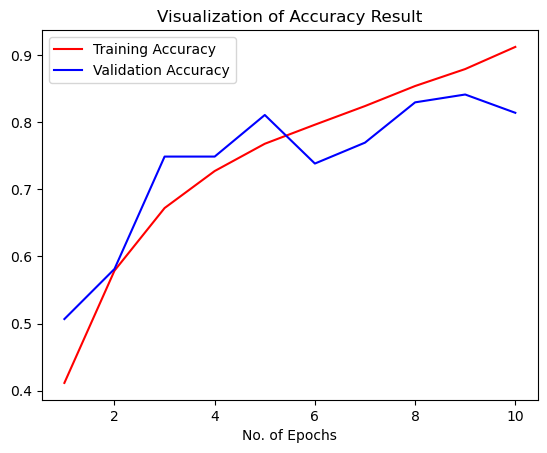

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
   r"D:\01 STUDY MATERIAL\ai project\mkfold\fold1\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2904 files belonging to 4 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2904/2904 [==============================] - 8s 3ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(2904,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(2904,), dtype=int64, numpy=array([0, 0, 1, ..., 3, 3, 3], dtype=int64)>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

        100X       0.85      0.77      0.81       760
        200X       0.78      0.94      0.85       744
        400X       0.94      0.95      0.94       655
         40X       0.96      0.85      0.90       745

    accuracy                           0.87      2904
   macro avg       0.88      0.88      0.88      2904
weighted avg       0.88      0.87      0.87      2904



## Confusion Matrix Visualization

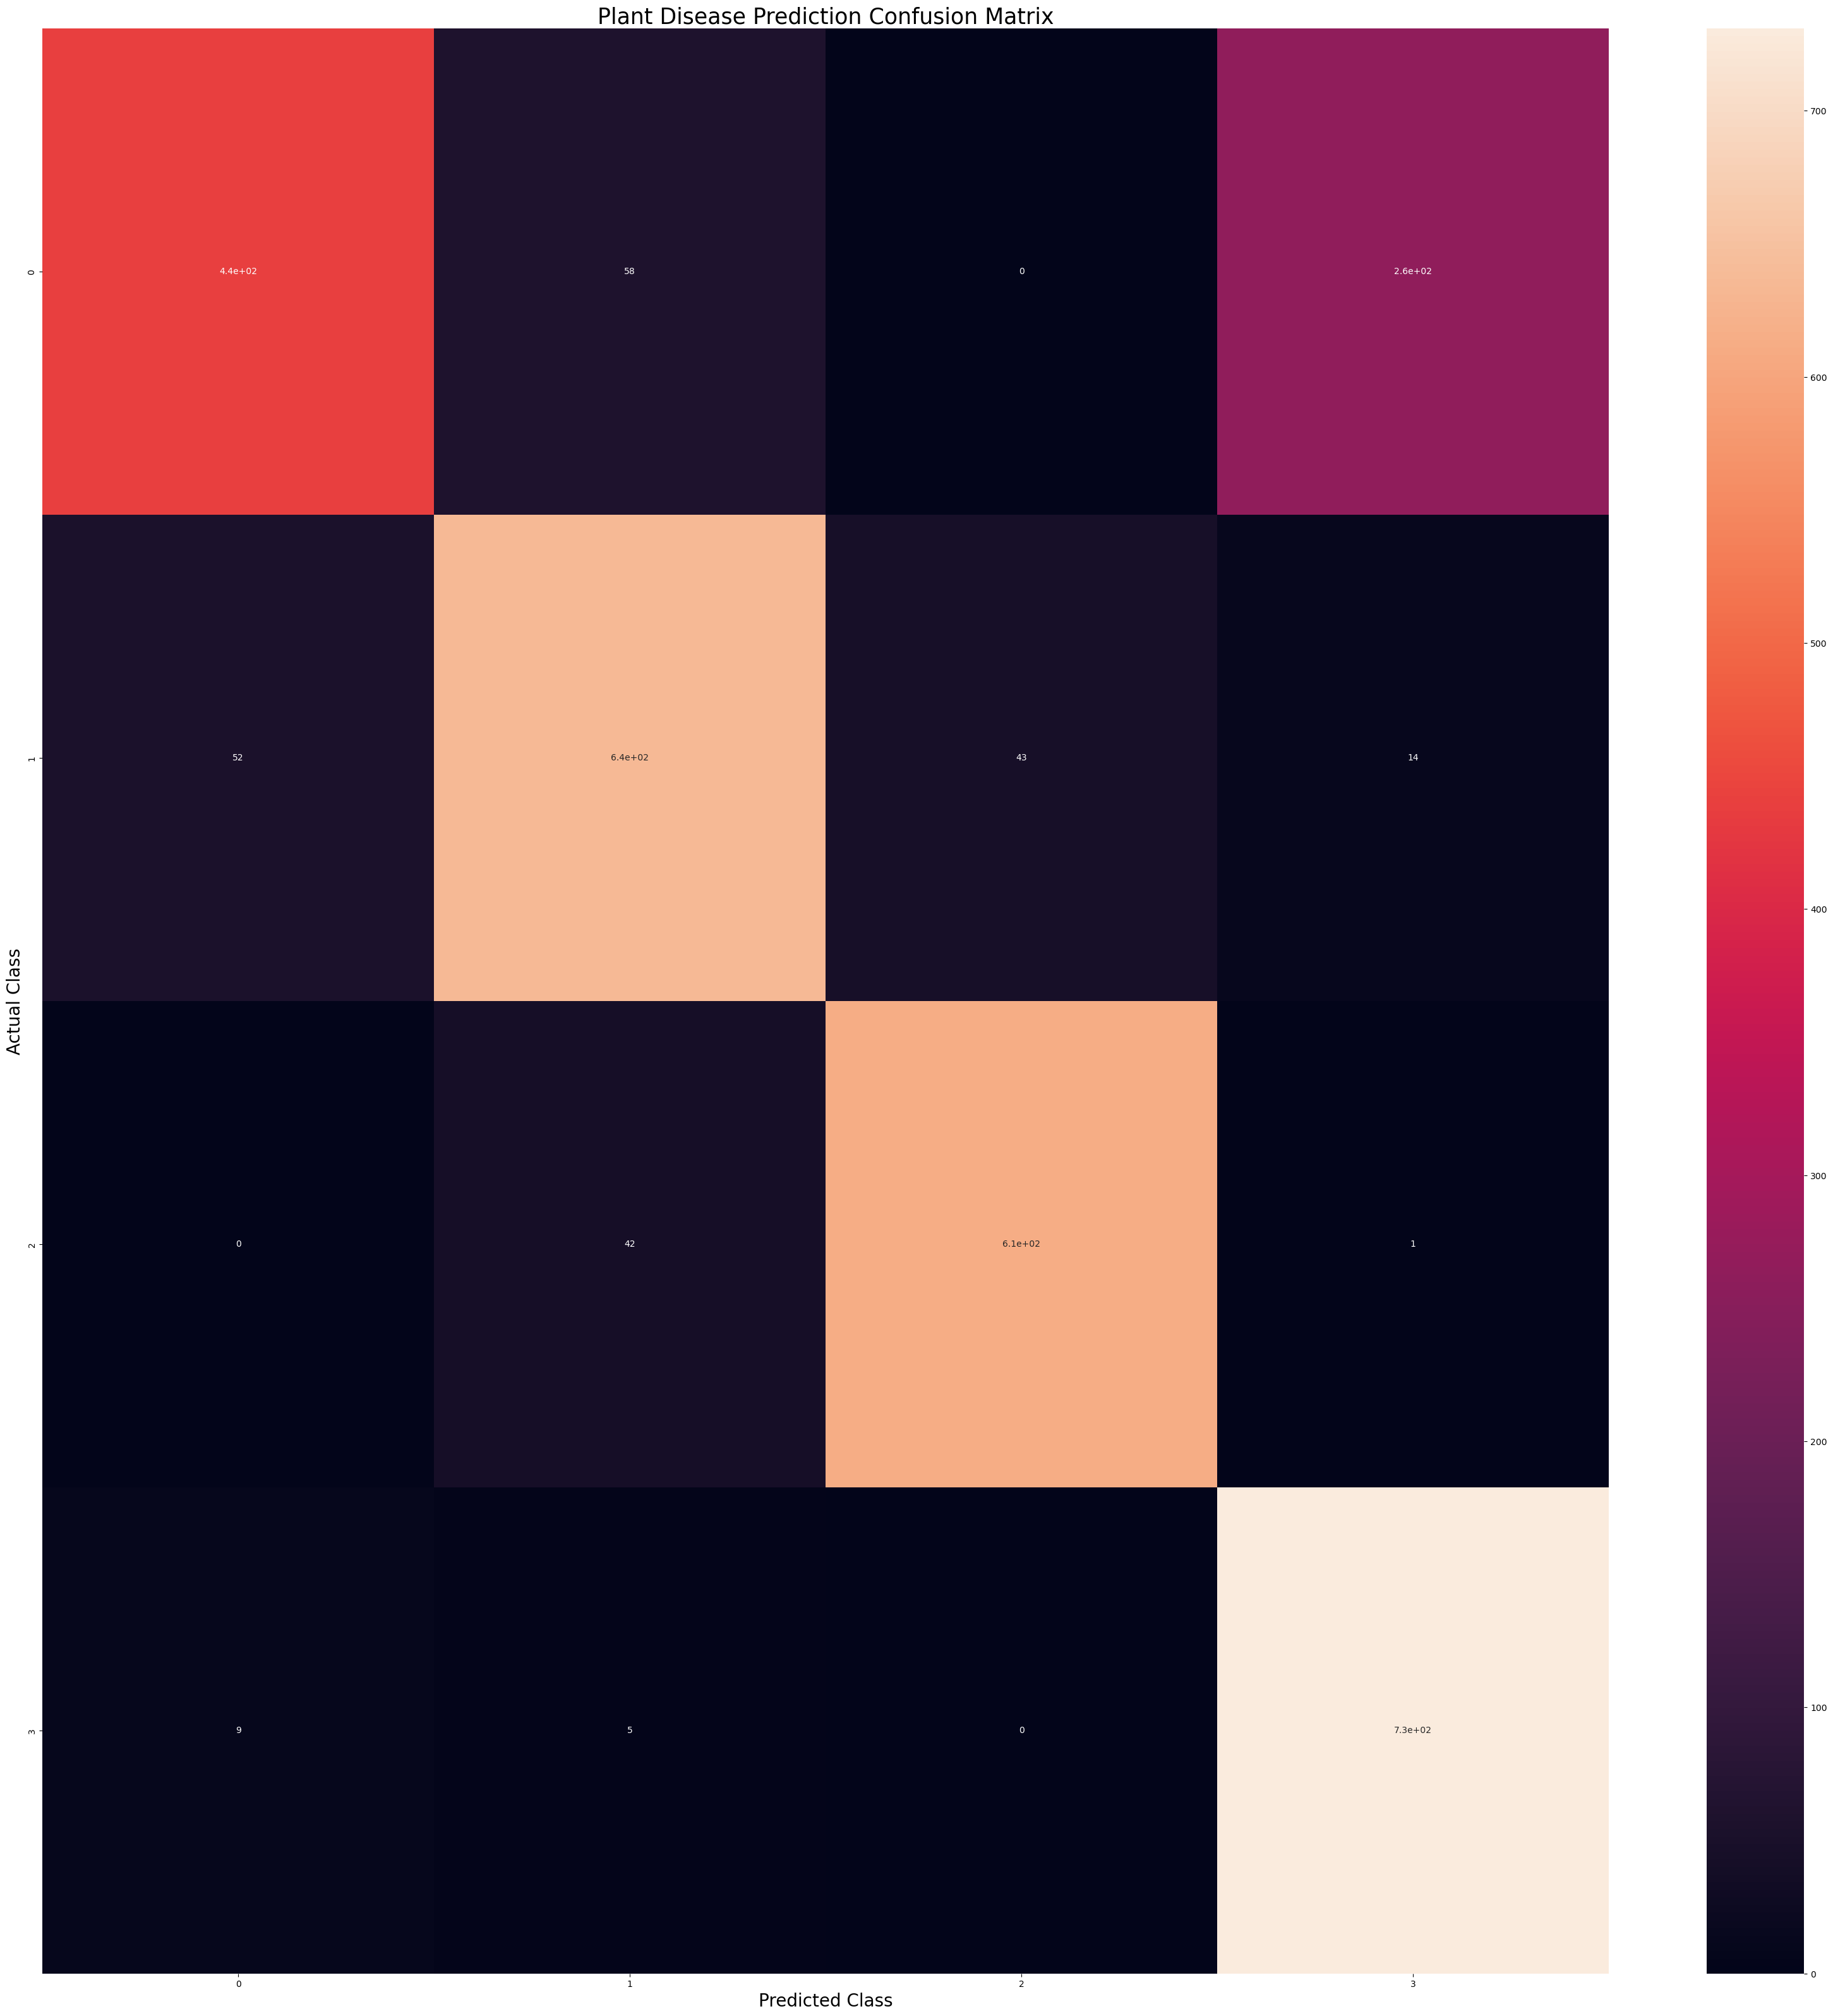

In [32]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Cancer Prediction Confusion Matrix',fontsize = 25)
plt.show()